In [1]:
import keras_vggface
import matplotlib.pyplot as plt
import mtcnn
from mtcnn import MTCNN
from PIL import Image
import numpy as np
from scipy.spatial.distance import cosine
from keras_vggface.utils import preprocess_input

In [2]:
def extract_face(filename, required_size=(224, 224)):
    pixels = plt.imread(filename)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [3]:
face1=extract_face('img1.jpeg')
face2=extract_face('img2.jpeg')
face3=extract_face('img3.jpeg')

1/1 [==============================] - 0s 273ms/step


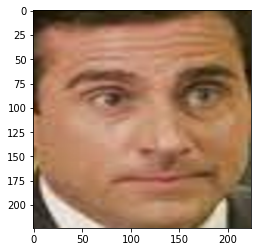

In [4]:
plt.imshow(face1)


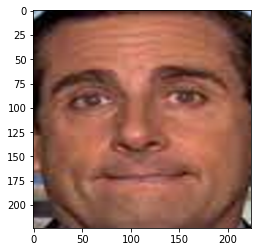

In [5]:
plt.imshow(face2)

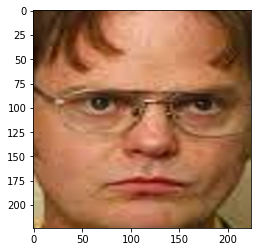

In [6]:
plt.imshow(face3)

In [7]:
from keras_vggface.vggface import VGGFace
model = VGGFace(model='resnet50')
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_10')>]
Outputs: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


In [48]:
def get_embeddings(filenames):
	faces = [extract_face(f) for f in filenames]
	samples = np.asarray(faces, 'float32')
	samples = preprocess_input(samples, version=2)
	model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
	yhat = model.predict(samples)
	return yhat
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [66]:
filenames=['img1.jpeg','img2.jpeg','img3.jpeg']

In [67]:
embeddings=get_embeddings(filenames)

1/1 [==============================] - 3s 3s/step


In [68]:
embeddings[2]

array([0.90803856, 0.20815621, 0.12591833, ..., 3.428005  , 0.95843995,
       2.129871  ], dtype=float32)

In [70]:
is_match(embeddings[0],embeddings[1])



>face is a Match (0.271 <= 0.500)
